In [1]:
# coding: utf-8     #주석보다 위에 달아야 함
# Module Name : titanic.py
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')   #경고 메세지 무시하기
#%matplotlib inline

# from sklearn.datasets import ____    #데이터셋
# from sklearn.metrics import ____   #평가
# from sklearn.

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
#데이터 프레임의 구조
#shape, describe, info, head
train_df.shape  #750 * 13

(891, 12)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA 과정

## 전처리/가공(Feature PreProcessing/Engineering)

결측처리 : 삭제(dropna) / 대체(fillna)

In [6]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [7]:
train_df['Embarked'].value_counts()  #대체할 데이터 = 많은 데이터로 채우려 함

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
train_df['Embarked'].fillna('S', inplace = True)  #빈 값은 S로 채움

In [9]:
train_df['Cabin'].value_counts()   #호실은 살아남은 것과 별 연관 없음 = 버릴 데이터

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
E101           3
              ..
T              1
B41            1
C50            1
A36            1
A31            1
Name: Cabin, Length: 147, dtype: int64

In [10]:
train_df['Cabin'].fillna('N', inplace = True)  #호수 없는 것 = N 처리

피처 삭제

In [11]:
train_df.drop(['PassengerId'], axis=1, inplace=True)

In [12]:
train_df['PC'] = train_df['SibSp'] + train_df['Parch']

In [13]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [14]:
# 통계 단변량 이변량 다변량 분석

In [15]:
# 정박지
train_df.groupby(["Embarked"])[["Survived"]].sum().sort_values(by="Survived",ascending=False)

,Survived
Embarked,
S,219
C,93
Q,30


In [16]:
# Cabin
train_df['Cabin_1'] = train_df['Cabin'].str[0:1]
train_df.groupby('Cabin_1')['Cabin_1'].count()

Cabin_1
A     15
B     47
C     59
D     33
E     32
F     13
G      4
N    687
T      1
Name: Cabin_1, dtype: int64

In [17]:
train_df['Cabin_2'] = train_df['Cabin'].str[2:]
train_df.groupby('Cabin_2')['Cabin_2'].count()

Cabin_2
                 715
0                 18
0 D12              1
01                 5
02                 1
03                 1
04                 1
06                 1
1                  7
1 B53 B55          2
10                 1
11                 1
18                 1
2                 11
2 B84              1
2 C26              3
2 C64              1
21                 2
23                 2
24                 2
25                 2
26                 2
28                 1
3                 14
3 C25 C27          4
4                 10
48                 1
5                 13
6                 14
6 B98              4
7                 13
7 B59 B63 B66      2
8                 16
8 B60              2
9                 12
E69                1
G63                1
G73                2
Name: Cabin_2, dtype: int64

In [18]:
train_df.drop(['Ticket','Fare','Embarked'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Cabin,PC,Cabin_1,Cabin_2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,N,1,N,
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C85,1,C,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,N,0,N,
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,C123,1,C,23
4,0,3,"Allen, Mr. William Henry",male,35.0,N,0,N,


In [19]:
# Mr. Mrs. Miss. 추출 (정규표현식)
# ([A-Za-z]+)\.
train_df['Name'] = train_df['Name'].str.extract("([A-Za-z]+)\.")
train_df['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Countess      1
Jonkheer      1
Sir           1
Lady          1
Capt          1
Don           1
Mme           1
Name: Name, dtype: int64

In [20]:
# name 다변량
train_df.groupby(["Name"])[["Survived"]].sum().sort_values(by="Survived",ascending=False)

,Survived
Name,
Miss,127
Mrs,99
Mr,81
Master,23
Dr,3
Mlle,2
Ms,1
Mme,1
Sir,1


In [21]:
# sex 다변량
train_df[["Sex","Pclass","Survived"]].groupby(["Sex","Pclass"]).sum().sort_values(by="Survived",ascending=False)

Survived
Sex    Pclass          
female 1             91
       3             72
       2             70
male   3             47
       1             45
       2             17

In [22]:
# PC
train_df[["PC","Survived"]].groupby(["PC"]).sum().sort_values(by="Survived",ascending=False)

,Survived
PC,
0,163
1,89
2,59
3,21
6,4
4,3
5,3
7,0
10,0


In [23]:
# Age 다변량 분석
# train_df[["Age","Survived"]].groupby(["Age"]).sum().sort_values(by="Survived",ascending=False).T

- Age : 구간화/범주화 : 함수 & lambda로 이용

In [24]:
def age_cate(age):
    if age >=0 and age <20:
        acate = 1
    elif age >=20 and age <40:
        acate = 2
    elif age >=40 and age <60:
        acate = 3
    else:
        acate = 4
    return acate

train_df["Age_cate"] = train_df["Age"].apply(age_cate)
train_df


train_df["Age_cate"] = train_df["Age"].apply(lambda x : 1 if x >=0 and x <20 else 
                                             (2 if x >=20 and x <40 else
                                             (3 if x >=40 and x <60 else 4)))

In [25]:
# Age_cate 다변량 분석
train_df[["Age_cate","Survived"]].groupby(["Age_cate"]).sum().sort_values(by="Survived",ascending=False)

,Survived
Age_cate,
2,202
1,79
3,54
4,7


In [26]:
# Age drop
train_df.drop(['Age'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Cabin,PC,Cabin_1,Cabin_2,Age_cate
0,0,3,Mr,male,N,1,N,,2
1,1,1,Mrs,female,C85,1,C,5,2
2,1,3,Miss,female,N,0,N,,2
3,1,1,Mrs,female,C123,1,C,23,2
4,0,3,Mr,male,N,0,N,,2


- Sex : 0 /1 로 카테고리화

In [27]:
def sex_cate(sex):
    if sex == 'female':
        scate = 1
    else:
        scate = 0
    return scate

train_df["Sex_cate"] = train_df["Sex"].apply(sex_cate)
train_df.head()

train_df["Sex_cate"].apply(lambda x: 1 if x == 'female' else 0)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Sex_cate, Length: 891, dtype: int64

# 피처 상관 분석(요소간 분석) / 연관 분석(이벤트 흐름에 대한 분석)
### 상관분석: 다중공선(비슷한 피처를 가지고 분석하면 과대/과소 평가)의 문제를 해결

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Cabin,PC,Cabin_1,Cabin_2,Age_cate,Sex_cate
0,0,3,Mr,male,N,1,N,,2,0
1,1,1,Mrs,female,C85,1,C,5,2,1
2,1,3,Miss,female,N,0,N,,2,1
3,1,1,Mrs,female,C123,1,C,23,2,1
4,0,3,Mr,male,N,0,N,,2,0


In [29]:
# 최종 컬럼 drop
drop_col = ['Name', 'Sex', 'Cabin', 'Cabin_1', 'Cabin_2']
train_df.drop(columns = drop_col, axis=1, inplace=True)


In [30]:
train_df.head()

,Survived,Pclass,PC,Age_cate,Sex_cate
0,0,3,1,2,0
1,1,1,1,2,1
2,1,3,0,2,1
3,1,1,1,2,1
4,0,3,0,2,0


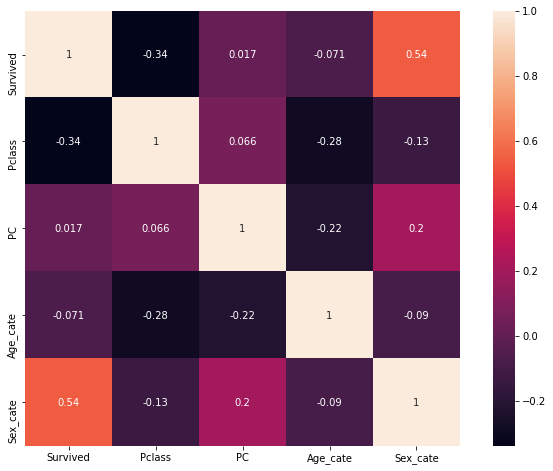

In [31]:
# heatmap by plt.pcolor()
corr = train_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, square =True, annot = True)
plt.show()

# 분석(모델선정/평가척도/)

#학습용(train)   평가용(test) 데이터 준비

In [32]:
# 데이터 분리
y = train_df["Survived"]
X = train_df.drop("Survived", axis=1)
print(X.shape, y.shape)

(891, 4) (891,)


In [33]:
X.head()

,Pclass,PC,Age_cate,Sex_cate
0,3,1,2,0
1,1,1,2,1
2,3,0,2,1
3,1,1,2,1
4,3,0,2,0


In [34]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=11)    #학습지와 시험지 분리

In [35]:
# 분류 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtModel = DecisionTreeClassifier()   #결정트리 분류모델
rfModel = RandomForestClassifier()

# 학습 : fit()    # trainX & trainY
dtModel.fit(trainX, trainY)

# 예측 : predict()
testY1 = dtModel.predict(testX)     #예측답안

In [36]:
# 점수 : score()
from sklearn.metrics import accuracy_score    # 정확도 메서드
score = accuracy_score(testY,testY1)   #예측답안 & 시험답안 맞춰보기
print(score)

0.8491620111731844
